The test environment used is a cluster of 4 c5n.xlarge AWS EC2 instances. 
Two different tests were used. The first test directory contains 26 files, each with a size of 256MB. The second test's folder includes 26 directories, each containing 500 files with a filesize of 12KB. In both cases the 26 items' blocks which are distributed to each thread are split equally to the cluster's 4 nodes.

In the test conditions we chose, only 3 out of the 4 processing units take up any work. This was chosen on purpose to simulate a scenario where not all of the system's processors are available to our application. 

A solution around optimal load distribution will be discussed at the end of this report.

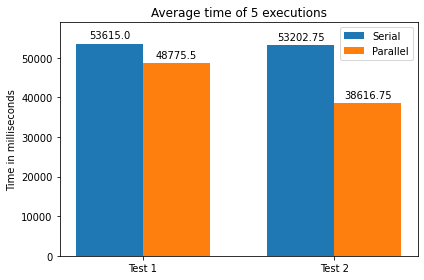

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

labels = ['Test 1', 'Test 2']
serial_times=[53615.0, 53202.75]
parallel_times=[48775.5, 38616.75]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, serial_times, width, label='Serial')
rects2 = ax.bar(x + width/2, parallel_times, width, label='Parallel')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in milliseconds')
ax.set_title('Average time of 5 executions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, max(serial_times + parallel_times) * 1.1) # 110% of max value
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

The first test's results do not show a great performance gain, but a gain is seen nonetheless, even taking in mind the case which we chose, where only 3 threads end up taking up any work. A 9% reduction in execution time is achieved.

The second test shows a 27.4% reduction in execution time, higher than the previous test, which is expected. One very important limitation when transferring many files is the processing overhead which, in our new implementation, is now shared across many processors.

The final and most important observation to give closure to this report goes as such. In our test environment, only one network adapter existed on each node. No matter how many processors we use, the gain will be attributed to the parallelization of all library-level and system-level operations associated with the localization process, but not the actual network transfer. This explains the behaviour of both tests, and due to the cases in which the performance gains were observed, and by taking into account the simplicity and maintainability of the newly introduced code, I believe this solution is good for a first iteration.

Bonus solution:
We could alternatively figure out the best partitioning by taking into account the directory's items' size and number of files (in the case of sub-directories). However, this would add too much complex code, but could perhaps be implemented in a future version.